In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
dt = pd.read_csv("Data.csv",
                 sep=";", on_bad_lines="skip")
dt.columns

Index(['Akun', 'Risiko', 'AR', 'IR', 'CR', ' Saldo 2022 ', ' Saldo 2021 ',
       '% Pertumbuhan', 'Temuan Tahun Sebelumnya', 'Opini',
       'Akun Pengecualian', 'Entitas'],
      dtype='object')

In [53]:
dt.drop('% Pertumbuhan', axis=1, inplace=True)

In [54]:
dt.head()

,Akun,Risiko,AR,IR,CR,Saldo 2022,Saldo 2021,Temuan Tahun Sebelumnya,Opini,Akun Pengecualian,Entitas
0,Kas di Kas Daerah,High,5%,H,M,7102298291,21461118738,Tidak,WDP,Tidak,BS
1,Kas di Bendahara Pengeluaran,High,5%,H,M,0,919574,Tidak,WDP,Ya,BS
2,Kas di Bendahara Penerimaan,High,5%,H,M,228539018,403475269,Tidak,WDP,Tidak,BS
3,Kas di Bendahara FKTP,High,5%,H,M,0,10480331,Ya,WDP,Ya,BS
4,Kas di Bendahara BOS,High,5%,H,M,470557177,5715111046,Ya,WDP,Ya,BS


##### Adding Percentage Grwoth Saldo

In [55]:
dt['Pertumbuhan Saldo'] = np.round(np.where(dt[' Saldo 2021 '] == 0, 0, 
                                   (dt[' Saldo 2022 '] - dt[' Saldo 2021 '])/dt[' Saldo 2021 '] * 100 ), decimals= 2)
dt.head()

,Akun,Risiko,AR,IR,CR,Saldo 2022,Saldo 2021,Temuan Tahun Sebelumnya,Opini,Akun Pengecualian,Entitas,Pertumbuhan Saldo
0,Kas di Kas Daerah,High,5%,H,M,7102298291,21461118738,Tidak,WDP,Tidak,BS,-66.91
1,Kas di Bendahara Pengeluaran,High,5%,H,M,0,919574,Tidak,WDP,Ya,BS,-100.00
2,Kas di Bendahara Penerimaan,High,5%,H,M,228539018,403475269,Tidak,WDP,Tidak,BS,-43.36
3,Kas di Bendahara FKTP,High,5%,H,M,0,10480331,Ya,WDP,Ya,BS,-100.00
4,Kas di Bendahara BOS,High,5%,H,M,470557177,5715111046,Ya,WDP,Ya,BS,-91.77


In [56]:
def data_characteristics(train):
    
    # displaying shape of the dataset
    print(f'Shape of the Dataset {train.shape}')
    print(f'Number of Columns in the Dataset {train.shape[1]}')
    print(f'Number of Rows in the Dataset {train.shape[0]}')
    
    # Understanding the Number of Numeric and Categorical features in dataset
    numeric_features = train.select_dtypes(include = [np.number])
    categoric_features = train.select_dtypes(exclude = [np.number])
    print("Number of Numerical Features : {}".format(numeric_features.shape[1]))
    print("Number of Categorical Features : {}".format(categoric_features.shape[1]))
    
    # Understanding the dataset
    print("Information of the Dataset : {}".format(train.info(verbose = False, memory_usage = "deep")))
    
data_characteristics(dt)
# Statistical Summary of the dataset
print("Statistical Summary of the Dataset : ")
dt.describe(include = "all").transpose()

Shape of the Dataset (177, 12)
Number of Columns in the Dataset 12
Number of Rows in the Dataset 177
Number of Numerical Features : 3
Number of Categorical Features : 9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Columns: 12 entries, Akun to Pertumbuhan Saldo
dtypes: float64(1), int64(2), object(9)
memory usage: 101.2 KB
Information of the Dataset : None
Statistical Summary of the Dataset : 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Akun,177,116,Lain-lain PAD yang Sah,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Risiko,177,3,High,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AR,177,1,5%,177,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IR,177,3,H,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CR,177,3,M,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saldo 2022,177.0,NaN,NaN,NaN,203489224559.146881,809723819141.249268,-4070230000000.0,1400660605.0,12558990597.0,140304000000.0,6936010000000.0
Saldo 2021,177.0,NaN,NaN,NaN,199041213922.220337,788333456587.454468,-3639020000000.0,3220185645.0,16963780479.0,117411000000.0,7153500000000.0
Temuan Tahun Sebelumnya,177,5,Tidak,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Opini,177,2,WTP,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Akun Pengecualian,177,3,Tidak,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Remove Character on Numerical Data and Convert to Numerical Data

In [57]:
dt['AR'] = dt['AR'].str.replace("%","")
# dt['Saldo 2022'] = dt['Saldo 2022'].str.replace("Rp","")
# dt['Saldo 2021'] = dt['Saldo 2021'].str.replace("Rp","")
# dt['% Pertumbuhan'] = dt['% Pertumbuhan'].str.replace("%","")
dt.head()

,Akun,Risiko,AR,IR,CR,Saldo 2022,Saldo 2021,Temuan Tahun Sebelumnya,Opini,Akun Pengecualian,Entitas,Pertumbuhan Saldo
0,Kas di Kas Daerah,High,5,H,M,7102298291,21461118738,Tidak,WDP,Tidak,BS,-66.91
1,Kas di Bendahara Pengeluaran,High,5,H,M,0,919574,Tidak,WDP,Ya,BS,-100.00
2,Kas di Bendahara Penerimaan,High,5,H,M,228539018,403475269,Tidak,WDP,Tidak,BS,-43.36
3,Kas di Bendahara FKTP,High,5,H,M,0,10480331,Ya,WDP,Ya,BS,-100.00
4,Kas di Bendahara BOS,High,5,H,M,470557177,5715111046,Ya,WDP,Ya,BS,-91.77


In [58]:
dt['AR'] = dt['AR'].apply(pd.to_numeric)
dt.head()

,Akun,Risiko,AR,IR,CR,Saldo 2022,Saldo 2021,Temuan Tahun Sebelumnya,Opini,Akun Pengecualian,Entitas,Pertumbuhan Saldo
0,Kas di Kas Daerah,High,5,H,M,7102298291,21461118738,Tidak,WDP,Tidak,BS,-66.91
1,Kas di Bendahara Pengeluaran,High,5,H,M,0,919574,Tidak,WDP,Ya,BS,-100.00
2,Kas di Bendahara Penerimaan,High,5,H,M,228539018,403475269,Tidak,WDP,Tidak,BS,-43.36
3,Kas di Bendahara FKTP,High,5,H,M,0,10480331,Ya,WDP,Ya,BS,-100.00
4,Kas di Bendahara BOS,High,5,H,M,470557177,5715111046,Ya,WDP,Ya,BS,-91.77


In [59]:
list_item = []
for col in dt.columns:
    list_item.append([col, dt[col].dtype, dt[col].isna().sum(), round((dt[col].isna().sum()/len(dt[col]))*100,2),
                      dt[col].nunique(), list(dt[col].sample(5).drop_duplicates().values)])

dfDesc = pd.DataFrame(columns=['features', 'data_type', 'null', 'nulPct', 'unique', 'uniqueSample'], data=list_item)
dfDesc

,features,data_type,null,nulPct,unique,uniqueSample
0,Akun,object,0,0.0,116,"[Persediaan, Beban Lain-lain, Beban Bantuan So..."
1,Risiko,object,0,0.0,3,"[Medium, High, Low]"
2,AR,int64,0,0.0,1,[5]
3,IR,object,0,0.0,3,[H]
4,CR,object,0,0.0,3,"[L, M, M ]"
5,Saldo 2022,int64,0,0.0,159,"[630624000000, 101299000000, 600058000000, 102..."
6,Saldo 2021,int64,0,0.0,165,"[175020000000, 37429377605, 1279559192, 347178..."
7,Temuan Tahun Sebelumnya,object,0,0.0,5,"[Tidak, Ada, tidak, Ya]"
8,Opini,object,0,0.0,2,"[WTP, WDP]"
9,Akun Pengecualian,object,0,0.0,3,"[Tidak, tidak, Ya]"


In [60]:
def data_characteristics(train):
    
    # displaying shape of the dataset
    print(f'Shape of the Dataset {train.shape}')
    print(f'Number of Columns in the Dataset {train.shape[1]}')
    print(f'Number of Rows in the Dataset {train.shape[0]}')
    
    # Understanding the Number of Numeric and Categorical features in dataset
    numeric_features = train.select_dtypes(include = [np.number])
    categoric_features = train.select_dtypes(exclude = [np.number])
    print("Number of Numerical Features : {}".format(numeric_features.shape[1]))
    print("Number of Categorical Features : {}".format(categoric_features.shape[1]))
    
    # Understanding the dataset
    print("Information of the Dataset : {}".format(train.info(verbose = False, memory_usage = "deep")))
    
data_characteristics(dt)
# Statistical Summary of the dataset
print("Statistical Summary of the Dataset : ")
dt.describe(include = "all").transpose()

Shape of the Dataset (177, 12)
Number of Columns in the Dataset 12
Number of Rows in the Dataset 177
Number of Numerical Features : 4
Number of Categorical Features : 8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Columns: 12 entries, Akun to Pertumbuhan Saldo
dtypes: float64(1), int64(3), object(8)
memory usage: 92.4 KB
Information of the Dataset : None
Statistical Summary of the Dataset : 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Akun,177,116,Lain-lain PAD yang Sah,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Risiko,177,3,High,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AR,177.0,NaN,NaN,NaN,5.0,0.0,5.0,5.0,5.0,5.0,5.0
IR,177,3,H,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CR,177,3,M,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saldo 2022,177.0,NaN,NaN,NaN,203489224559.146881,809723819141.249268,-4070230000000.0,1400660605.0,12558990597.0,140304000000.0,6936010000000.0
Saldo 2021,177.0,NaN,NaN,NaN,199041213922.220337,788333456587.454468,-3639020000000.0,3220185645.0,16963780479.0,117411000000.0,7153500000000.0
Temuan Tahun Sebelumnya,177,5,Tidak,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Opini,177,2,WTP,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Akun Pengecualian,177,3,Tidak,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Mengatasi Inkonsisten

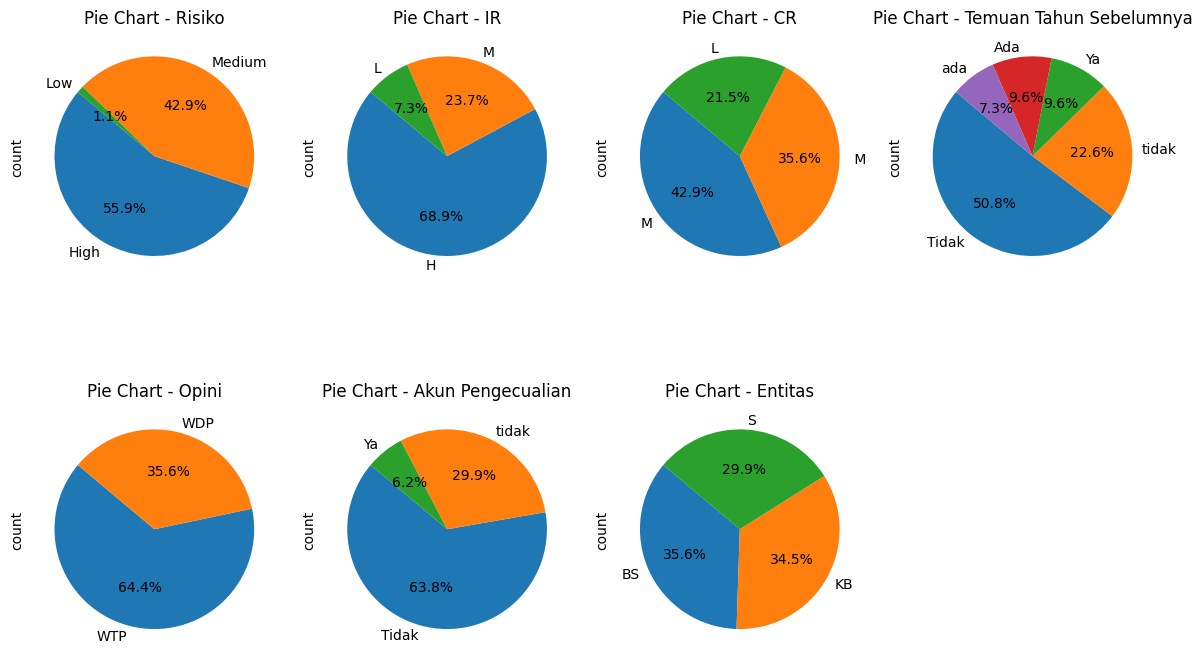

In [61]:
column_to_exclude = 'Akun'

# Menentukan jumlah kolom dan baris untuk plot
cat_columns = dt.select_dtypes(include='object').columns.tolist()
cat_columns = [col for col in cat_columns if col != column_to_exclude]

num_cols = len(cat_columns)
num_rows = 1  # Anda dapat menyesuaikan jumlah baris sesuai kebutuhan

# Mengatur ukuran gambar
plt.figure(figsize=(12, 8))
# fig, axes = plt.subplots(2, 1, figsize=(15, 15))

# Mengiterasi melalui setiap kolom kategori untuk membuat pie chart
for i, column in enumerate(cat_columns):
    plt.subplot(2, 4, i+1)
    dt[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart - {column}')

plt.tight_layout()
plt.show()

In [62]:
dt['Temuan Tahun Sebelumnya'] =  dt['Temuan Tahun Sebelumnya'].replace(['Ya','ada','tidak'], 
                                                                       ['Ada','Ada','Tidak'], 
                                                                       regex= True)
dt['Akun Pengecualian'] =  dt['Akun Pengecualian'].replace(['tidak'], 'Tidak', regex= True)
dt['CR'] = dt['CR'].str.replace(" ","")

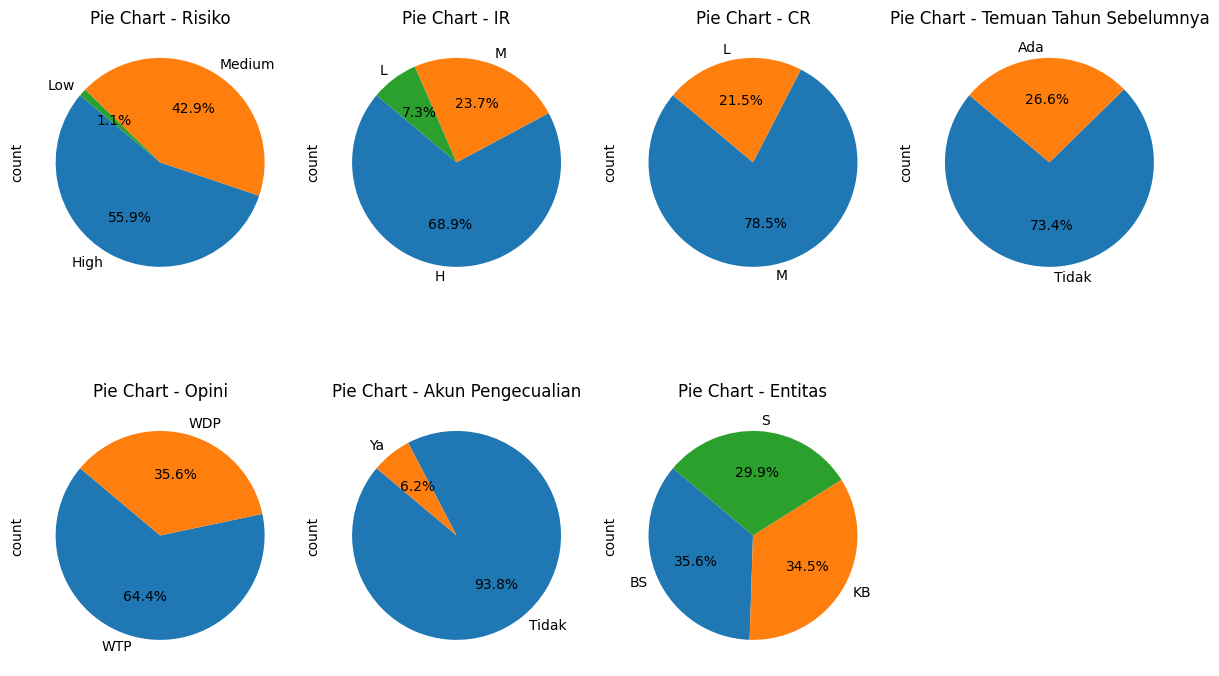

In [63]:
column_to_exclude = 'Akun'

# Menentukan jumlah kolom dan baris untuk plot
cat_columns = dt.select_dtypes(include='object').columns.tolist()
cat_columns = [col for col in cat_columns if col != column_to_exclude]

num_cols = len(cat_columns)
num_rows = 1  # Anda dapat menyesuaikan jumlah baris sesuai kebutuhan

# Mengatur ukuran gambar
plt.figure(figsize=(12, 8))
# fig, axes = plt.subplots(2, 1, figsize=(15, 15))

# Mengiterasi melalui setiap kolom kategori untuk membuat pie chart
for i, column in enumerate(cat_columns):
    plt.subplot(2, 4, i+1)
    dt[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart - {column}')

plt.tight_layout()
plt.show()

In [64]:
list_item = []
for col in dt.columns:
    list_item.append([col, dt[col].dtype, dt[col].isna().sum(), round((dt[col].isna().sum()/len(dt[col]))*100,2),
                      dt[col].nunique(), list(dt[col].sample(5).drop_duplicates().values)])

dfDesc = pd.DataFrame(columns=['features', 'data_type', 'null', 'nulPct', 'unique', 'uniqueSample'],data=list_item)
dfDesc

,features,data_type,null,nulPct,unique,uniqueSample
0,Akun,object,0,0.0,116,"[Aset Tetap Tanah , Tanah, Kas Di Bendahara JK..."
1,Risiko,object,0,0.0,3,"[Medium, High]"
2,AR,int64,0,0.0,1,[5]
3,IR,object,0,0.0,3,"[L, H]"
4,CR,object,0,0.0,2,"[L, M]"
5,Saldo 2022,int64,0,0.0,159,"[1018270682, 11602919400, 64864065039, 1246052..."
6,Saldo 2021,int64,0,0.0,165,"[1225081166, 16963780479, 3220185645, 93929663..."
7,Temuan Tahun Sebelumnya,object,0,0.0,2,"[Tidak, Ada]"
8,Opini,object,0,0.0,2,"[WDP, WTP]"
9,Akun Pengecualian,object,0,0.0,2,[Tidak]


### Menanagani Inkonsisten Kateogri Akun

##### Review Akun Belanja

In [65]:
dt.Akun[dt['Akun'].str.contains('Belanja')].value_counts()

Akun
Belanja Pegawai                         3
Belanja Tak Terduga                     3
Belanja Peralatan dan Mesin             3
Belanja Jalan, Irigasi dan Jaringan     2
Belanja Tanah                           2
Belanja Barang dan Jasa                 2
Belanja Aset Tetap Lainnya              2
Belanja Gedung dan Bangunan             2
Belanja Jalan, Irigasi dan Jaringan     1
Belanja Barang  dan Jasa                1
Belanja Tanah                           1
Belanja Bunga                           1
Belanja Hibah                           1
Belanja Subsidi                         1
Belanja gedung dan Bangunan             1
Belanja Aset Tetap lainnya              1
Belanja Dibayar Dimuka                  1
Name: count, dtype: int64

In [66]:
dt.Akun[dt['Akun'].str.contains('Belanja Jalan')]

39     Belanja Jalan, Irigasi dan Jaringan 
78      Belanja Jalan, Irigasi dan Jaringan
134     Belanja Jalan, Irigasi dan Jaringan
Name: Akun, dtype: object

In [67]:
dt['Akun'] = dt['Akun'].str.rstrip() # remove space behind and in front of

In [68]:
dt['Akun'] = dt['Akun'].str.replace('Belanja Barang  dan Jasa', 'Belanja Barang dan Jasa', regex = True)
dt['Akun'] = dt['Akun'].str.replace('Belanja gedung dan Bangunan', 'Belanja Gedung dan Bangunan', regex = True)
dt['Akun'] = dt['Akun'].str.replace('Belanja Aset Tetap lainnya', 'Belanja Aset Tetap Lainnya', regex = True)

In [69]:
dt.Akun[dt['Akun'].str.contains("Belanja")].value_counts()

Akun
Belanja Pegawai                        3
Belanja Barang dan Jasa                3
Belanja Tanah                          3
Belanja Peralatan dan Mesin            3
Belanja Gedung dan Bangunan            3
Belanja Jalan, Irigasi dan Jaringan    3
Belanja Aset Tetap Lainnya             3
Belanja Tak Terduga                    3
Belanja Subsidi                        1
Belanja Hibah                          1
Belanja Bunga                          1
Belanja Dibayar Dimuka                 1
Name: count, dtype: int64

##### Review Akun PAD

In [70]:
dt.Akun[dt["Akun"].str.contains("Pendapatan")].value_counts()

Akun
Pendapatan Hasil Pengelolaan Kekayaan Daerah yang Dipisahkan               4
Pendapatan Retribusi Daerah                                                4
Pendapatan Pajak Daerah                                                    4
Pendapatan Diterima Dimuka                                                 2
Pendapatan Luar Biasa                                                      2
Pendapatan Hibah                                                           2
Lain-Lain Pendapatan yang Sah                                              2
Bagi Hasil Pendapatan Lainnya                                              1
Pendapatan Bagi Hasil Lainnya                                              1
PAD Pendapatan Pajak Daerah                                                1
PAD Pendapatan Retribusi Daerah                                            1
PAD - Pendapatan Rettribusi Daerah                                         1
PAD - Pendapatan Pajak Daerah                                          

In [71]:
dt.Akun[dt["Akun"].str.contains("PAD")].value_counts()

Akun
Lain-lain PAD yang Sah                                              6
Piutang PAD Lainnya                                                 2
PAD Pendapatan Pajak Daerah                                         1
PAD Pendapatan Retribusi Daerah                                     1
PAD Pendapatan Hasil Pengelolaan Kekayaan Daerah yang Dipisahkan    1
PAD - Pendapatan Pajak Daerah                                       1
PAD - Pendapatan Rettribusi Daerah                                  1
PAD - Hasil Kekayaan Daerah yang Dipisahkan                         1
Name: count, dtype: int64

In [72]:
dt['Akun'] = dt['Akun'].replace(["Pendapatan Pajak Daerah",'PAD Pendapatan Pajak Daerah'], ['PAD - Pendapatan Pajak Daerah',
                                'PAD - Pendapatan Pajak Daerah'])
dt['Akun'] = dt['Akun'].replace(['PAD Pendapatan Retribusi Daerah','PAD - Pendapatan Rettribusi Daerah',
                                'Pendapatan Retribusi Daerah'], 
                                    ['PAD - Pendapatan Retribusi Daerah','PAD - Pendapatan Retribusi Daerah',
                                    'PAD - Pendapatan Retribusi Daerah'])
dt['Akun'] = dt['Akun'].replace(['Pendapatan Hasil Pengelolaan Kekayaan Daerah yang Dipisahkan',
                                'PAD Pendapatan Hasil Pengelolaan Kekayaan Daerah yang Dipisahkan'], 
                                'PAD - Hasil Kekayaan Daerah yang Dipisahkan')

In [73]:
dt.Akun[dt["Akun"].str.contains("PAD")].value_counts()

Akun
PAD - Pendapatan Pajak Daerah                  6
PAD - Pendapatan Retribusi Daerah              6
PAD - Hasil Kekayaan Daerah yang Dipisahkan    6
Lain-lain PAD yang Sah                         6
Piutang PAD Lainnya                            2
Name: count, dtype: int64

In [74]:
dt.head()

,Akun,Risiko,AR,IR,CR,Saldo 2022,Saldo 2021,Temuan Tahun Sebelumnya,Opini,Akun Pengecualian,Entitas,Pertumbuhan Saldo
0,Kas di Kas Daerah,High,5,H,M,7102298291,21461118738,Tidak,WDP,Tidak,BS,-66.91
1,Kas di Bendahara Pengeluaran,High,5,H,M,0,919574,Tidak,WDP,Ya,BS,-100.00
2,Kas di Bendahara Penerimaan,High,5,H,M,228539018,403475269,Tidak,WDP,Tidak,BS,-43.36
3,Kas di Bendahara FKTP,High,5,H,M,0,10480331,Ada,WDP,Ya,BS,-100.00
4,Kas di Bendahara BOS,High,5,H,M,470557177,5715111046,Ada,WDP,Ya,BS,-91.77


In [75]:
dt.drop(['AR'], axis = 1, inplace = True)

#### Exploratory Data Analytics

In [25]:
dt['Risiko'].value_counts()

Risiko
High      99
Medium    76
Low        2
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

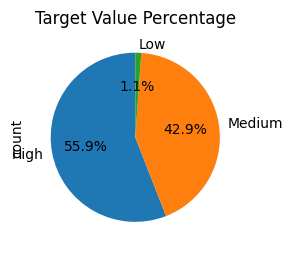

In [26]:
import matplotlib.pyplot as plt

dt['Risiko'].value_counts().plot(kind='pie', 
                                    subplots=True, 
                                    shadow = False,
                                    startangle=90,
                                    figsize=(3,3), 
                                    labels = ['High', 'Medium', 'Low'],
                                    autopct='%1.1f%%')
plt.title('Target Value Percentage')
plt.tight_layout()
plt.show

        Saldo 2022    Saldo 2021 
count  1.770000e+02  1.770000e+02
mean   2.034892e+11  1.990412e+11
std    8.097238e+11  7.883335e+11
min   -4.070230e+12 -3.639020e+12
25%    1.400661e+09  3.220186e+09
50%    1.255899e+10  1.696378e+10
75%    1.403040e+11  1.174110e+11
max    6.936010e+12  7.153500e+12

Distribution of data before being handled by Outliers: 


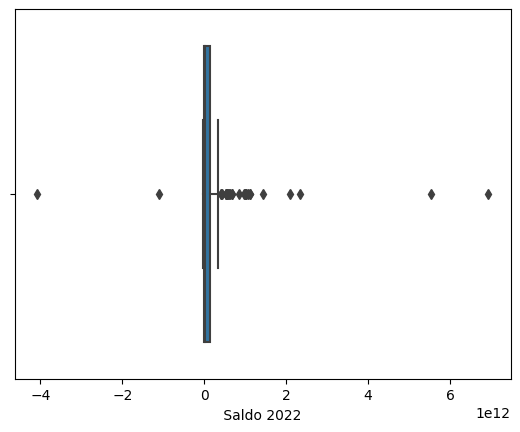

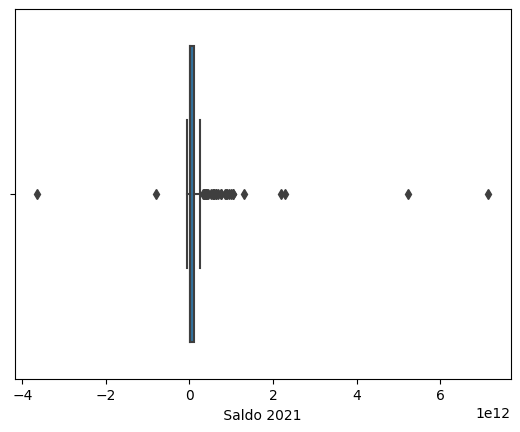

In [27]:
def outlier_checking(dt):
    
    col = [" Saldo 2022 ", " Saldo 2021 "]
    print(dt[col].describe())
    
    print('\nDistribution of data before being handled by Outliers: ')
    # checking the distribution of features of the dataset
    for i in col:
        plt.figure() # untuk membuat figure baru
        sns.boxplot(x=dt[i])
        plt.show()
    
outlier_checking(dt)

In [28]:
col = [' Saldo 2022 ', ' Saldo 2021 ']

Q1 = dt[col].quantile(0.25)
Q3 = dt[col].quantile(0.75)

IQR = Q3 - Q1

# Extreme Outliers
minimum = Q1 - (IQR*3)
print(f'minimum value for each variable are: \n {minimum}')
maksimum = Q3 + (IQR*3)
print(f'maksimum value for each variable are: \n {maksimum}')

minimum value for each variable are: 
  Saldo 2022    -4.153094e+11
 Saldo 2021    -3.393523e+11
dtype: float64
maksimum value for each variable are: 
  Saldo 2022     5.570140e+11
 Saldo 2021     4.599834e+11
dtype: float64


In [29]:
dt.head()

,Akun,Risiko,AR,IR,CR,Saldo 2022,Saldo 2021,Temuan Tahun Sebelumnya,Opini,Akun Pengecualian,Entitas,Pertumbuhan Saldo
0,Kas di Kas Daerah,High,5,H,M,7102298291,21461118738,Tidak,WDP,Tidak,BS,-66.91
1,Kas di Bendahara Pengeluaran,High,5,H,M,0,919574,Tidak,WDP,Ya,BS,-100.00
2,Kas di Bendahara Penerimaan,High,5,H,M,228539018,403475269,Tidak,WDP,Tidak,BS,-43.36
3,Kas di Bendahara FKTP,High,5,H,M,0,10480331,Ada,WDP,Ya,BS,-100.00
4,Kas di Bendahara BOS,High,5,H,M,470557177,5715111046,Ada,WDP,Ya,BS,-91.77


#### Anova

In [30]:
from scipy.stats import f_oneway
result = f_oneway(dt[' Saldo 2021 '][dt['Risiko']=='High'], 
                  dt[' Saldo 2021 '][dt['Risiko']=='Medium'],
                  dt[' Saldo 2021 '][dt['Risiko']=='Low'])

# Menampilkan hasil uji ANOVA
print("Hasil Uji ANOVA: Variabel Saldo 2021 dengan Variabel Risiko")
print("Statistic:", result.statistic)
print("p-value:", result.pvalue)

Hasil Uji ANOVA: Variabel Saldo 2021 dengan Variabel Risiko
Statistic: 0.044682030278466456
p-value: 0.9563124773732082


In [31]:
from scipy.stats import f_oneway
result = f_oneway(dt[' Saldo 2022 '][dt['Risiko']=='High'], 
                  dt[' Saldo 2022 '][dt['Risiko']=='Medium'],
                  dt[' Saldo 2022 '][dt['Risiko']=='Low'])

# Menampilkan hasil uji ANOVA
print("Hasil Uji ANOVA: Variabel Saldo 2022 dengan Variabel Risiko")
print("Statistic:", result.statistic)
print("p-value:", result.pvalue)

Hasil Uji ANOVA: Variabel Saldo 2022 dengan Variabel Risiko
Statistic: 0.016368186725707088
p-value: 0.9837665587055987


In [32]:
from scipy.stats import f_oneway
result = f_oneway(dt['Pertumbuhan Saldo'][dt['Risiko']=='High'], 
                  dt['Pertumbuhan Saldo'][dt['Risiko']=='Medium'],
                  dt['Pertumbuhan Saldo'][dt['Risiko']=='Low'])

# Menampilkan hasil uji ANOVA
print("Hasil Uji ANOVA: Variabel Pertumbuhan Saldo dengan Variabel Risiko")
print("Statistic:", result.statistic)
print("p-value:", result.pvalue)

Hasil Uji ANOVA: Variabel Pertumbuhan Saldo dengan Variabel Risiko
Statistic: 0.2891096856026148
p-value: 0.7492891087164943


In [33]:
from scipy.stats import f_oneway
result = f_oneway(dt['AR'][dt['Risiko']=='High'], 
                  dt['AR'][dt['Risiko']=='Medium'],
                  dt['AR'][dt['Risiko']=='Low'])

# Menampilkan hasil uji ANOVA
print("Hasil Uji ANOVA: Variabel Pertumbuhan Saldo dengan Variabel Risiko")
print("Statistic:", result.statistic)
print("p-value:", result.pvalue)

Hasil Uji ANOVA: Variabel Pertumbuhan Saldo dengan Variabel Risiko
Statistic: nan
p-value: nan


C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\scipy\stats\_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


#### Uji Chi Square

In [46]:
from scipy.stats import chi2_contingency

# Membuat tabel kontingensi menggunakan pd.crosstab()
contingency_table = pd.crosstab(dt['Entitas'], dt['Risiko'])

# Menampilkan tabel kontingensi
print("Tabel Kontingensi:")
print(contingency_table)

# Melakukan uji chi-square
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Menampilkan hasil uji chi-square
print("\nHasil Uji Chi-square:")
print(f"Nilai Chi-square: {chi2}")
print(f"P-value: {p_value}")

Tabel Kontingensi:
Risiko    0  1   2
Entitas           
0        48  0  15
1        30  1  30
2        21  1  31

Hasil Uji Chi-square:
Nilai Chi-square: 17.66878990632389
P-value: 0.001432249458183369


In [47]:
from sklearn import preprocessing 
category_col =['Risiko','IR','CR', 'Temuan Tahun Sebelumnya','Opini','Akun Pengecualian', 'Entitas']  
labelEncoder = preprocessing.LabelEncoder() 
  
mapping_dict ={} 
for col in category_col: 
    dt[col] = labelEncoder.fit_transform(dt[col]) 
  
    le_name_mapping = dict(zip(labelEncoder.classes_, 
                        labelEncoder.transform(labelEncoder.classes_))) 
  
    mapping_dict[col]= le_name_mapping 
print(mapping_dict)

{'Risiko': {0: 0, 1: 1, 2: 2}, 'IR': {0: 0, 1: 1, 2: 2}, 'CR': {0: 0, 1: 1}, 'Temuan Tahun Sebelumnya': {0: 0, 1: 1}, 'Opini': {0: 0, 1: 1}, 'Akun Pengecualian': {0: 0, 1: 1}, 'Entitas': {0: 0, 1: 1, 2: 2}}


In [48]:
dt.head()

,Akun,Risiko,AR,IR,CR,Saldo 2022,Saldo 2021,Temuan Tahun Sebelumnya,Opini,Akun Pengecualian,Entitas,Pertumbuhan Saldo
0,Kas di Kas Daerah,0,5,0,1,7102298291,21461118738,1,0,0,0,-66.91
1,Kas di Bendahara Pengeluaran,0,5,0,1,0,919574,1,0,1,0,-100.00
2,Kas di Bendahara Penerimaan,0,5,0,1,228539018,403475269,1,0,0,0,-43.36
3,Kas di Bendahara FKTP,0,5,0,1,0,10480331,0,0,1,0,-100.00
4,Kas di Bendahara BOS,0,5,0,1,470557177,5715111046,0,0,1,0,-91.77


In [49]:
column_to_move = "Risiko"

other_column = [col for col in dt.columns if col!= column_to_move]

new_order = other_column + [column_to_move]

dt = dt[new_order]
dt.head()

,Akun,AR,IR,CR,Saldo 2022,Saldo 2021,Temuan Tahun Sebelumnya,Opini,Akun Pengecualian,Entitas,Pertumbuhan Saldo,Risiko
0,Kas di Kas Daerah,5,0,1,7102298291,21461118738,1,0,0,0,-66.91,0
1,Kas di Bendahara Pengeluaran,5,0,1,0,919574,1,0,1,0,-100.00,0
2,Kas di Bendahara Penerimaan,5,0,1,228539018,403475269,1,0,0,0,-43.36,0
3,Kas di Bendahara FKTP,5,0,1,0,10480331,0,0,1,0,-100.00,0
4,Kas di Bendahara BOS,5,0,1,470557177,5715111046,0,0,1,0,-91.77,0


In [51]:
dt.drop('Akun', axis= 1, inplace=True)

KeyError: "['Akun'] not found in axis"

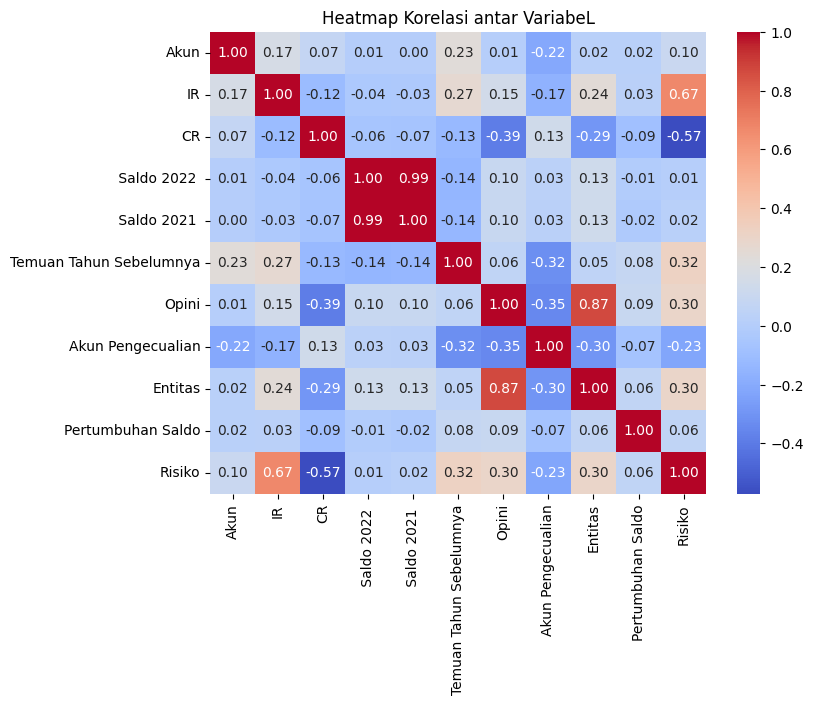

In [281]:
# Menghitung korelasi antar kolom
correlation_matrix = dt.corr()

# Membuat heatmap untuk menampilkan korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi antar VariabeL')
plt.show()

In [282]:
dt.head()

,Akun,IR,CR,Saldo 2022,Saldo 2021,Temuan Tahun Sebelumnya,Opini,Akun Pengecualian,Entitas,Pertumbuhan Saldo,Risiko
0,63,0,1,7102298291,21461118738,1,0,0,0,-66.91,0
1,62,0,1,0,919574,1,0,1,0,-100.00,0
2,61,0,1,228539018,403475269,1,0,0,0,-43.36,0
3,60,0,1,0,10480331,0,0,1,0,-100.00,0
4,58,0,1,470557177,5715111046,0,0,1,0,-91.77,0


In [283]:
dt.drop([' Saldo 2022 ',' Saldo 2021 ', 'Pertumbuhan Saldo'], axis= 1, inplace= True)

In [284]:
dt.head()

,Akun,IR,CR,Temuan Tahun Sebelumnya,Opini,Akun Pengecualian,Entitas,Risiko
0,63,0,1,1,0,0,0,0
1,62,0,1,1,0,1,0,0
2,61,0,1,1,0,0,0,0
3,60,0,1,0,0,1,0,0
4,58,0,1,0,0,1,0,0


### Building Model Machine Learning

In [285]:
from sklearn.model_selection import train_test_split

x = dt.drop('Risiko', axis = 1)
y = dt['Risiko']

from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range = (0, 1))
# X = scaler.fit_transform(x)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=42)

print('Jumlah baris dan kolom dari x_train adalah:', X_train.shape,', sedangkan Jumlah baris dan kolom dari y_train adalah:', Y_train.shape)
print('Prosentase Churn di data Training adalah:')
print(Y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:', X_test.shape,', sedangkan Jumlah baris dan kolom dari y_test adalah:', Y_test.shape)
print('Prosentase Churn di data Testing adalah:')
print(Y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (141, 7) , sedangkan Jumlah baris dan kolom dari y_train adalah: (141,)
Prosentase Churn di data Training adalah:
Risiko
0    0.531915
2    0.460993
1    0.007092
Name: proportion, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (36, 7) , sedangkan Jumlah baris dan kolom dari y_test adalah: (36,)
Prosentase Churn di data Testing adalah:
Risiko
0    0.666667
2    0.305556
1    0.027778
Name: proportion, dtype: float64


##### Multinomial Regression

In [301]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score

In [288]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, recall_score, precision_score

# fit the model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train, Y_train)

# make prediction
train_pred_log = logreg.predict(X_train)
pred_log = logreg.predict(X_test)

cm_log_train = confusion_matrix(Y_train, train_pred_log)
cm_log = confusion_matrix(Y_test, pred_log )


print('=============== CLASSIFICATION REPORT LOGISTIC REGRESSION FOR TRAINING DATA ===============')
print(classification_report(Y_train, train_pred_log))
print()
# tn, fp, fn, tp = confusion_matrix(Y_train, train_pred_log).ravel()
# print('tn : ',tn, ' fp : ',fp,' fn : ' ,fn,' tp : ' ,tp)

print('=============== CLASSIFICATION REPORT LOGISTIC REGRESSION FOR TESTING DATA ===============')
print(classification_report(Y_test,pred_log))
print()
# tn, fp, fn, tp = confusion_matrix(Y_test,pred_log).ravel()
# print('tn : ',tn, ' fp : ',fp,' fn : ' ,fn,' tp : ' ,tp)

=============== CLASSIFICATION REPORT LOGISTIC REGRESSION FOR TRAINING DATA ===============
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        75
           1       0.00      0.00      0.00         1
           2       0.97      0.97      0.97        65

    accuracy                           0.97       141
   macro avg       0.65      0.65      0.65       141
weighted avg       0.96      0.97      0.97       141


=============== CLASSIFICATION REPORT LOGISTIC REGRESSION FOR TESTING DATA ===============
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.00      0.00      0.00         1
           2       0.85      1.00      0.92        11

    accuracy                           0.94        36
   macro avg       0.62      0.65      0.63        36
weighted avg       0.93      0.94      0.93        36




C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:146

In [304]:
from sklearn.model_selection import cross_val_score

# fit the model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Melakukan K-Fold Cross Validation (contoh dengan K=5)
cv_scores = cross_val_score(logreg, X_train, Y_train, cv=5)

# Menampilkan hasil cross-validation
print("CV Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

CV Scores: [0.93103448 1.         1.         0.92857143 1.        ]
Mean CV Score: 0.9719211822660098


C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numb

In [305]:
# fit the model
dr = DecisionTreeClassifier()
dr.fit(X_train, Y_train)

# make prediction
train_pred_dt = dr.predict(X_train)
pred_dt = dr.predict(X_test)

cm_dt_train = confusion_matrix(Y_train, train_pred_dt)
cm_dt = confusion_matrix(Y_test, pred_dt)


print('=============== CLASSIFICATION REPORT DECISION TREE FOR TESTING DATA ===============')
print(classification_report(Y_train, train_pred_dt))
print()

print('=============== CLASSIFICATION REPORT DECISION TREE FOR TESTING DATA ===============')
print(classification_report(Y_test,pred_dt))
print()

=============== CLASSIFICATION REPORT DECISION TREE FOR TESTING DATA ===============
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00        65

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141


=============== CLASSIFICATION REPORT DECISION TREE FOR TESTING DATA ===============
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.00      0.00      0.00         1
           2       0.85      1.00      0.92        11

    accuracy                           0.94        36
   macro avg       0.62      0.65      0.63        36
weighted avg       0.93      0.94      0.93        36




C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [306]:
from sklearn.model_selection import cross_val_score

# fit the model
dr = DecisionTreeClassifier()

# Melakukan K-Fold Cross Validation (contoh dengan K=5)
cv_scores = cross_val_score(dr, X_train, Y_train, cv=5)

# Menampilkan hasil cross-validation
print("CV Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

CV Scores: [0.93103448 1.         0.92857143 0.92857143 1.        ]
Mean CV Score: 0.9576354679802955


C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [302]:
# fit the model
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

# make prediction
train_pred_dt = rf.predict(X_train)
pred_dt = rf.predict(X_test)

cm_dt_train = confusion_matrix(Y_train, train_pred_dt)
cm_dt = confusion_matrix(Y_test, pred_dt)


print('=============== CLASSIFICATION REPORT DECISION TREE FOR TESTING DATA ===============')
print(classification_report(Y_train, train_pred_dt))
print()

print('=============== CLASSIFICATION REPORT DECISION TREE FOR TESTING DATA ===============')
print(classification_report(Y_test,pred_dt))
print()

=============== CLASSIFICATION REPORT DECISION TREE FOR TESTING DATA ===============
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00        65

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141


=============== CLASSIFICATION REPORT DECISION TREE FOR TESTING DATA ===============
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.00      0.00      0.00         1
           2       0.85      1.00      0.92        11

    accuracy                           0.94        36
   macro avg       0.62      0.65      0.63        36
weighted avg       0.93      0.94      0.93        36




C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [307]:
from sklearn.model_selection import cross_val_score

# fit the model
rf = RandomForestClassifier()

# Melakukan K-Fold Cross Validation (contoh dengan K=5)
cv_scores = cross_val_score(rf, X_train, Y_train, cv=5)

# Menampilkan hasil cross-validation
print("CV Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


CV Scores: [0.93103448 1.         0.92857143 0.92857143 1.        ]
Mean CV Score: 0.9576354679802955


In [308]:
from sklearn.ensemble import GradientBoostingClassifier

gbt = GradientBoostingClassifier().fit(X_train, Y_train)

# make prediction
train_pred_gbt = gbt.predict(X_train)
pred_gbt = gbt.predict(X_test)

cm_gbt_train = confusion_matrix(Y_train, train_pred_gbt)
cm_gbt = confusion_matrix(Y_test, pred_gbt)

print('=============== CLASSIFICATION REPORT GRADIENT BOOSTING FOR TRAINING DATA ===============')
print(classification_report(Y_train, train_pred_gbt))
print()

print('=============== CLASSIFICATION REPORT GRADIENT BOOSTING FOR TESTING DATA ===============')
print(classification_report(Y_test,pred_gbt))
print()

=============== CLASSIFICATION REPORT GRADIENT BOOSTING FOR TRAINING DATA ===============
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00        65

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141


=============== CLASSIFICATION REPORT GRADIENT BOOSTING FOR TESTING DATA ===============
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.00      0.00      0.00         1
           2       0.85      1.00      0.92        11

    accuracy                           0.94        36
   macro avg       0.62      0.65      0.63        36
weighted avg       0.93      0.94      0.93        36




C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [309]:
from sklearn.model_selection import cross_val_score

# fit the model
gbt = GradientBoostingClassifier().fit(X_train, Y_train)

# Melakukan K-Fold Cross Validation (contoh dengan K=5)
cv_scores = cross_val_score(gbt, X_train, Y_train, cv=5)

# Menampilkan hasil cross-validation
print("CV Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


CV Scores: [0.89655172 1.         0.96428571 0.92857143 0.96428571]
Mean CV Score: 0.9507389162561577


In [310]:
from xgboost import XGBClassifier
from sklearn.metrics import top_k_accuracy_score

xgb = XGBClassifier().fit(X_train, Y_train)

# make prediction
train_pred_xgb = xgb.predict(X_train)
pred_xgb = xgb.predict(X_test)
pred_xgb_prob = xgb.predict_proba(X_test)

cm_xgb_train = confusion_matrix(Y_train, train_pred_xgb)
cm_xgb= confusion_matrix(Y_test, pred_xgb)


print('=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TRAINING DATA ===============')
print(classification_report(Y_train, train_pred_xgb))
print()

print('=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TESTING DATA ===============')
print(classification_report(Y_test,pred_xgb))
print()

=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TRAINING DATA ===============
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00        65

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141


=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TESTING DATA ===============
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.00      0.00      0.00         1
           2       0.85      1.00      0.92        11

    accuracy                           0.94        36
   macro avg       0.62      0.65      0.63        36
weighted avg       0.93      0.94      0.93        36




C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [324]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# fit the model
xgb = XGBClassifier(objective='multi:softmax', num_class=3, error_score='raise').fit(X_train, Y_train)

try :
    # Inisialisasi Stratified K-Fold
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Melakukan K-Fold Cross Validation (contoh dengan K=5)
    cv_scores = cross_val_score(xgb, X_train, Y_train, cv=kfold)
    
    # Menampilkan hasil cross-validation
    print("CV Scores:", cv_scores)
    print("Mean CV Score:", cv_scores.mean())

except Exception as e:
    print("Error during training:", str(e))

C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [23:57:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "error_score" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [23:57:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "error_score" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:1

CV Scores: [       nan 0.96428571 1.         0.96428571 0.96428571]
Mean CV Score: nan


C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [23:57:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "error_score" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_vali

In [312]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier().fit(X_train, Y_train)

# make prediction
train_pred_gbt = knn.predict(X_train)
pred_gbt = knn.predict(X_test)

cm_gbt_train = confusion_matrix(Y_train, train_pred_gbt)
cm_gbt = confusion_matrix(Y_test, pred_gbt)


print('=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TESTING DATA ===============')
print(classification_report(Y_train, train_pred_gbt))
print()

print('=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TESTING DATA ===============')
print(classification_report(Y_test,pred_gbt))
print()

=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TESTING DATA ===============
              precision    recall  f1-score   support

           0       0.78      0.92      0.84        75
           1       0.00      0.00      0.00         1
           2       0.87      0.69      0.77        65

    accuracy                           0.81       141
   macro avg       0.55      0.54      0.54       141
weighted avg       0.81      0.81      0.80       141


=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TESTING DATA ===============
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        24
           1       0.00      0.00      0.00         1
           2       0.56      0.82      0.67        11

    accuracy                           0.75        36
   macro avg       0.49      0.52      0.49        36
weighted avg       0.77      0.75      0.75        36




C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [313]:
from sklearn.model_selection import cross_val_score

# fit the model
knn = KNeighborsClassifier().fit(X_train, Y_train)


# Melakukan K-Fold Cross Validation (contoh dengan K=5)
cv_scores = cross_val_score(knn, X_train, Y_train, cv=5)

# Menampilkan hasil cross-validation
print("CV Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

CV Scores: [0.5862069  0.46428571 0.57142857 0.67857143 0.67857143]
Mean CV Score: 0.5958128078817735


C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [314]:
from xgboost import XGBClassifier
from sklearn.metrics import top_k_accuracy_score

xgb = XGBClassifier(eta = 0.005, max_depth = 4, reg_lambda = 3).fit(X_train, Y_train)
# xgb = XGBClassifier(eta = 0.1, max_depth = 2, reg_lambda = 6).fit(X_train, Y_train)

# make prediction
train_pred_xgb = xgb.predict(X_train)
pred_xgb = xgb.predict(X_test)
pred_xgb_prob = xgb.predict_proba(X_test)

cm_xgb_train = confusion_matrix(Y_train, train_pred_xgb)
cm_xgb= confusion_matrix(Y_test, pred_xgb)


print('=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TRAINING DATA ===============')
print(classification_report(Y_train, train_pred_xgb))
print()

print('=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TESTING DATA ===============')
print(classification_report(Y_test,pred_xgb))
print()

=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TRAINING DATA ===============
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        75
           1       0.00      0.00      0.00         1
           2       0.97      0.97      0.97        65

    accuracy                           0.97       141
   macro avg       0.65      0.65      0.65       141
weighted avg       0.96      0.97      0.97       141


=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TESTING DATA ===============
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.00      0.00      0.00         1
           2       0.85      1.00      0.92        11

    accuracy                           0.94        36
   macro avg       0.62      0.65      0.63        36
weighted avg       0.93      0.94      0.93        36




C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [320]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# fit the model
xgb = XGBClassifier(eta = 0.005, max_depth = 4, reg_lambda = 3).fit(X_train, Y_train)

# Inisialisasi Stratified K-Fold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Melakukan K-Fold Cross Validation (contoh dengan K=5)
cv_scores = cross_val_score(xgb, X_train, Y_train, cv=kfold)

# Menampilkan hasil cross-validation
print("CV Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


CV Scores: [       nan 0.96428571 1.         1.         0.96428571]
Mean CV Score: nan


C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\

In [325]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Inisialisasi model XGBoost
model = xgb.XGBClassifier()

# Definisikan grid parameter yang ingin dioptimalkan
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [100, 200, 300]
}

# Inisialisasi GridSearchCV dengan model dan grid parameter
grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=1)

# Melakukan pencarian parameter terbaik
grid_search.fit(X_train, Y_train)

# Menampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

# Prediksi dengan model yang telah dituning
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluasi performa model
accuracy = accuracy_score(Y_test, y_pred)
print("Akurasi model terbaik:", accuracy)


Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Parameter terbaik: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Akurasi model terbaik: 0.9444444444444444


C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
27 fits failed out of a total of 81.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packag

In [327]:
from xgboost import XGBClassifier
from sklearn.metrics import top_k_accuracy_score

xgb = XGBClassifier(eta = 0.1, max_depth = 3).fit(X_train, Y_train)

# make prediction
train_pred_xgb = xgb.predict(X_train)
pred_xgb = xgb.predict(X_test)
pred_xgb_prob = xgb.predict_proba(X_test)

cm_xgb_train = confusion_matrix(Y_train, train_pred_xgb)
cm_xgb= confusion_matrix(Y_test, pred_xgb)


print('=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TRAINING DATA ===============')
print(classification_report(Y_train, train_pred_xgb))
print()

print('=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TESTING DATA ===============')
print(classification_report(Y_test,pred_xgb))
print()

=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TRAINING DATA ===============
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00        65

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141


=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TESTING DATA ===============
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.00      0.00      0.00         1
           2       0.85      1.00      0.92        11

    accuracy                           0.94        36
   macro avg       0.62      0.65      0.63        36
weighted avg       0.93      0.94      0.93        36




C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alfazrin.banapon\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

#### Saving Model

In [84]:
import pickle

filename = 'Risk_Modelling.sav'
pickle.dump(gbt, open(filename, 'wb'))

In [85]:
input_data = (1,0,0,0,1,1,0,-100)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# scaler = MinMaxScaler(feature_range = (0, 1))
# input_data_as_numpy_array_scaler = scaler.fit_transform(input_data_reshaped)

prediction = gbt.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('High')
elif (prediction[0] == 1):
  print("Low")
else:
  print('Medium')

C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


[2]
Medium


In [300]:
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import BorderlineSMOTE


def SMOTE_eval_method(features,target,model):
    
#     X_train, X_test, y_train, y_test = train_test_split(X_traain, target,test_size=0.2,random_state=101)
    sm = BorderlineSMOTE(random_state=42)
    X_sm, y_sm = sm.fit_resample(X_train,Y_train)
    
    classifcation = model()
    classifcation.fit(X_sm,y_sm)
        
    ## For describe model underfitting or Overfitting
    prediction_train = classifcation.predict(X_sm)
    prediction_test = classifcation.predict(X_test)
    
    # Evaluation Model Train After SMOTE
    accuracy_train = accuracy_score(y_sm,prediction_train)
    
    # Evaluation Model Data Test After SMOTE 
    accuracy_test = accuracy_score(Y_test,prediction_test)
    
    all_score = [accuracy_train,accuracy_test]
    return all_score

all_score=[]
best_algorithm = [LogisticRegression,DecisionTreeClassifier,RandomForestClassifier, GradientBoostingClassifier,
             XGBClassifier, GaussianNB, KNeighborsClassifier, AdaBoostClassifier, SGDClassifier]

for item in best_algorithm :
    score = SMOTE_eval_method(X_train,X_test,item)
    all_score.append(score)
    
df_score = pd.DataFrame(all_score,index=['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier', 
                                     'GradientBoostingClassifier','XGBClassifier', 'GaussianNB',
                                        'KNeighborsClassifier', 'AdaBoostClassifier', 'SGDClassifier'],
                        columns=['accuracy_train','accuracy_test'])
df_score 

ModuleNotFoundError: No module named 'imblearn'

In [88]:
from sklearn.ensemble import GradientBoostingClassifier

gbt = GradientBoostingClassifier(learning_rate= 0.01, max_depth= 1, n_estimators= 20).fit(X_train, Y_train)

# make prediction
train_pred_gbt = gbt.predict(X_train)
pred_gbt = gbt.predict(X_test)

cm_gbt_train = confusion_matrix(Y_train, train_pred_gbt)
cm_gbt = confusion_matrix(Y_test, pred_gbt)

print('=============== CLASSIFICATION REPORT GRADIENT BOOSTING FOR TRAINING DATA ===============')
print(classification_report(Y_train, train_pred_gbt))
print()

print('=============== CLASSIFICATION REPORT GRADIENT BOOSTING FOR TESTING DATA ===============')
print(classification_report(Y_test,pred_gbt))
print()

print('\n------------------ Confusion Matrix Training -----------------\n')
print(confusion_matrix(Y_train, train_pred_gbt))
print('\n------------------ Confusion Matrix Training -----------------\n')
print(confusion_matrix(Y_test, pred_gbt))

=============== CLASSIFICATION REPORT GRADIENT BOOSTING FOR TRAINING DATA ===============
              precision    recall  f1-score   support

           0       0.76      0.99      0.86        75
           1       0.00      0.00      0.00         1
           2       0.95      0.65      0.77        65

    accuracy                           0.82       141
   macro avg       0.57      0.54      0.54       141
weighted avg       0.85      0.82      0.81       141


=============== CLASSIFICATION REPORT GRADIENT BOOSTING FOR TESTING DATA ===============
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        24
           1       0.00      0.00      0.00         1
           2       0.82      0.82      0.82        11

    accuracy                           0.89        36
   macro avg       0.58      0.59      0.59        36
weighted avg       0.86      0.89      0.88        36



------------------ Confusion Matrix Training -----------

C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

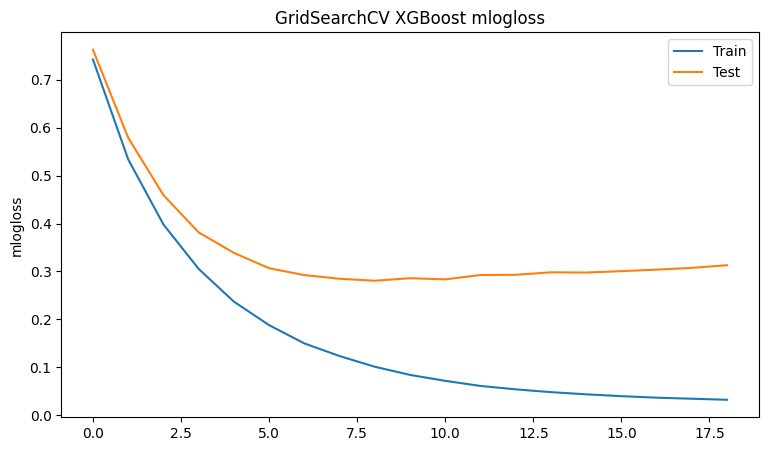

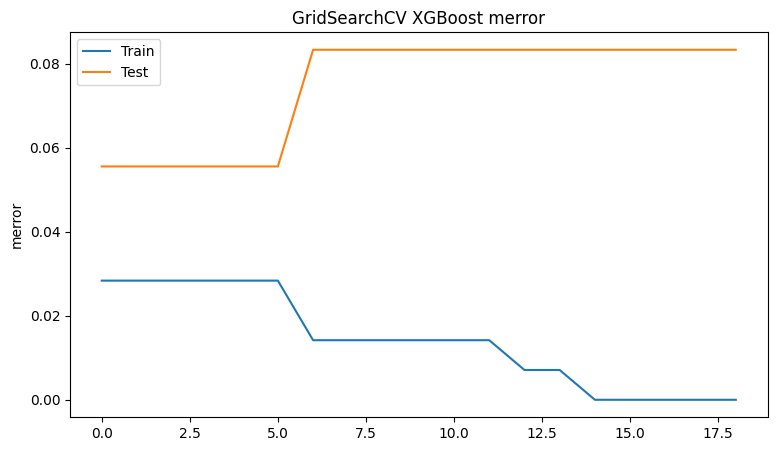


------------------ Confusion Matrix -----------------

[[22  0  2]
 [ 0  0  1]
 [ 0  0 11]]

-------------------- Key Metrics --------------------

Accuracy traing: 0.82

Accuracy testing: 0.92
Balanced Accuracy: 0.64

Micro Precision: 0.92
Micro Recall: 0.92
Micro F1-score: 0.92

Macro Precision: 0.60
Macro Recall: 0.64
Macro F1-score: 0.61

Weighted Precision: 0.91
Weighted Recall: 0.92
Weighted F1-score: 0.91

------------------ Confusion Matrix Training -----------------

[[74  0  1]
 [ 0  0  1]
 [23  0 42]]

------------------ Confusion Matrix Testing -----------------

[[23  0  1]
 [ 0  0  1]
 [ 2  0  9]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        24
           1       0.00      0.00      0.00         1
           2       0.79      1.00      0.88        11

    accuracy                           0.92        36
   macro avg       0.60      0.64      0.61        36
weighted avg       0.91      0.92      0.91        36


C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [99]:
from xgboost import XGBClassifier
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(objective='multi:softmax', 
                            num_class=3, 
                            missing=1, 
                            early_stopping_rounds=10, 
                            eval_metric=['merror','mlogloss'], 
                            seed=42)
xgb_clf.fit(X_train, 
            Y_train,
            verbose=0, # set to 1 to see xgb training round intermediate results
            eval_set=[(X_train, Y_train), (X_test, Y_test)])

# preparing evaluation metric plots
results = xgb_clf.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

# xgboost 'mlogloss' plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('mlogloss')
plt.title('GridSearchCV XGBoost mlogloss')
plt.show()

# xgboost 'merror' plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('merror')
plt.title('GridSearchCV XGBoost merror')
plt.show()

## ---------- Model Classification Report ----------
## get predictions and create model quality report

y_pred = xgb_clf.predict(X_test)

print('\n------------------ Confusion Matrix -----------------\n')
print(confusion_matrix(Y_test, y_pred))

print('\n-------------------- Key Metrics --------------------')
print('\nAccuracy traing: {:.2f}'.format(accuracy_score(Y_train, train_pred_gbt)))
print('\nAccuracy testing: {:.2f}'.format(accuracy_score(Y_test, y_pred)))
print('Balanced Accuracy: {:.2f}\n'.format(balanced_accuracy_score(Y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(Y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(Y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(Y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(Y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(Y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(Y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(Y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(Y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(Y_test, y_pred, average='weighted')))


print('\n------------------ Confusion Matrix Training -----------------\n')
print(confusion_matrix(Y_train, train_pred_gbt))
print('\n------------------ Confusion Matrix Testing -----------------\n')
print(confusion_matrix(Y_test, pred_gbt))
print(classification_report(Y_test, y_pred))
print('---------------------- XGBoost ----------------------') # unnecessary fancy styling

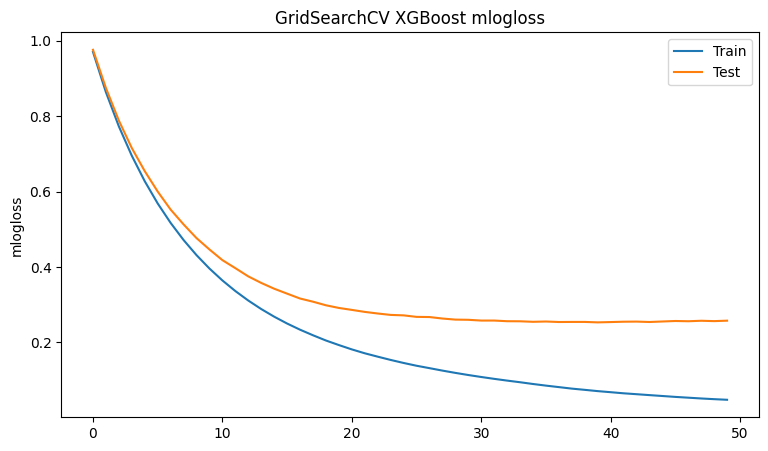

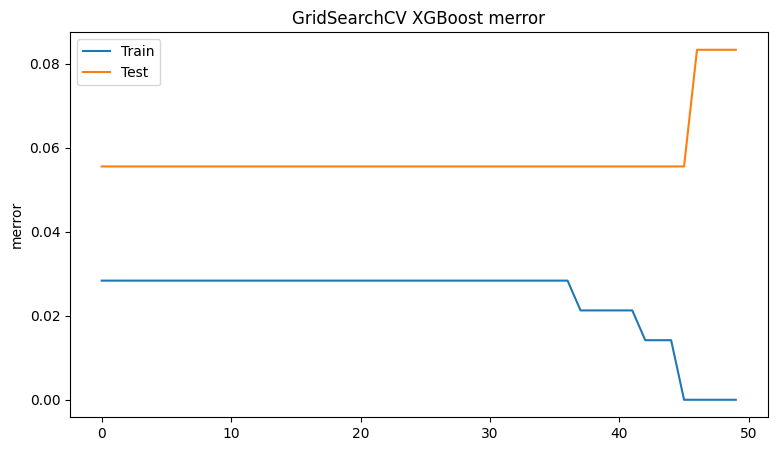


------------------ Confusion Matrix -----------------

[[23  0  1]
 [ 0  0  1]
 [ 0  0 11]]

Accuracy: 0.94
Balanced Accuracy: 0.65

Micro Precision: 0.94
Micro Recall: 0.94
Micro F1-score: 0.94

Macro Precision: 0.62
Macro Recall: 0.65
Macro F1-score: 0.63

Weighted Precision: 0.93
Weighted Recall: 0.94
Weighted F1-score: 0.93

------------------ Confusion Matrix Training -----------------

[[74  0  1]
 [ 0  0  1]
 [23  0 42]]

------------------ Confusion Matrix Testing -----------------

[[23  0  1]
 [ 0  0  1]
 [ 2  0  9]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.00      0.00      0.00         1
           2       0.85      1.00      0.92        11

    accuracy                           0.94        36
   macro avg       0.62      0.65      0.63        36
weighted avg       0.93      0.94      0.93        36

---------------------- XGBoost ----------------------


C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
## ---------- XGBoost model v2 ----------
## second run of model with "optimized" hyperparameters 

# declaring and fitting xgb classifier
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', 
                            num_class=3, 
                            missing=1,
                            gamma=0, # default gamma value
                            learning_rate=0.1,
                            max_depth=3,
                            reg_lambda=1, # default L2 value
                            subsample=1, # default subsample value
                            colsample_bytree=1, # default colsample_bytree value
                            early_stopping_rounds=10,
                            eval_metric=['merror','mlogloss'],
                            seed=42)
xgb_clf.fit(X_train, 
            Y_train,
            verbose=0, # set to 1 to see xgb training round intermediate results
            #sample_weight=sample_weights, # class weights to combat unbalanced 'target'
            eval_set=[(X_train, Y_train), (X_test, Y_test)])

# preparing evaluation metric plots
results = xgb_clf.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

# xgboost 'mlogloss' plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('mlogloss')
plt.title('GridSearchCV XGBoost mlogloss')
plt.show()

# xgboost 'merror' plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('merror')
plt.title('GridSearchCV XGBoost merror')
plt.show()

## ---------- Model Classification Report ----------
## get predictions and create model quality report

y_pred = xgb_clf.predict(X_test)

print('\n------------------ Confusion Matrix -----------------\n')
print(confusion_matrix(Y_test, y_pred))

print('\nAccuracy: {:.2f}'.format(accuracy_score(Y_test, y_pred)))
print('Balanced Accuracy: {:.2f}\n'.format(balanced_accuracy_score(Y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(Y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(Y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(Y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(Y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(Y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(Y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(Y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(Y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(Y_test, y_pred, average='weighted')))

print('\n------------------ Confusion Matrix Training -----------------\n')
print(confusion_matrix(Y_train, train_pred_gbt))
print('\n------------------ Confusion Matrix Testing -----------------\n')
print(confusion_matrix(Y_test, pred_gbt))
print(classification_report(Y_test, y_pred))
print('---------------------- XGBoost ----------------------') # unnecessary fancy styling

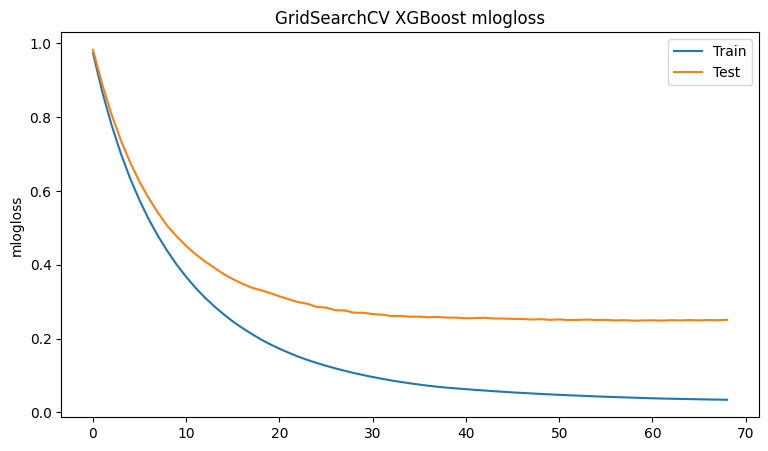

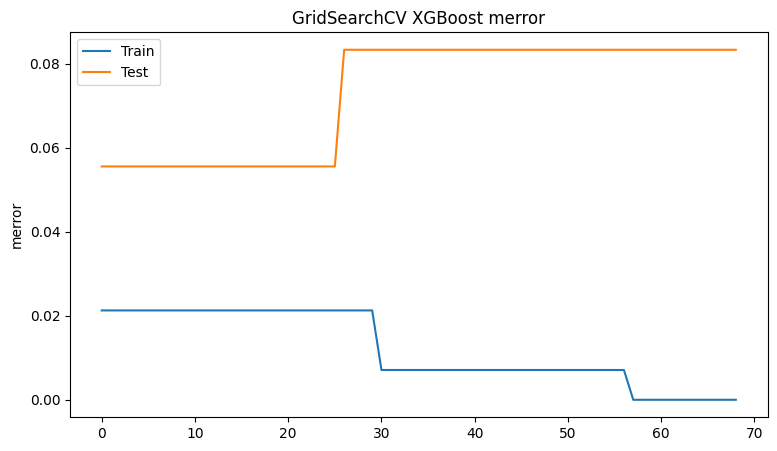


------------------ Confusion Matrix -----------------

[[22  0  2]
 [ 0  0  1]
 [ 0  0 11]]

Accuracy: 0.92
Balanced Accuracy: 0.64

Micro Precision: 0.92
Micro Recall: 0.92
Micro F1-score: 0.92

Macro Precision: 0.60
Macro Recall: 0.64
Macro F1-score: 0.61

Weighted Precision: 0.91
Weighted Recall: 0.92
Weighted F1-score: 0.91

--------------- Classification Report ---------------

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        24
           1       0.00      0.00      0.00         1
           2       0.79      1.00      0.88        11

    accuracy                           0.92        36
   macro avg       0.60      0.64      0.61        36
weighted avg       0.91      0.92      0.91        36

---------------------- XGBoost ----------------------


C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
## ---------- XGBoost model v3 ----------
## third run of model with "optimized" hyperparameters and
## attempting to treat unbalanced target classes

# balancing 'target' class weights
from sklearn.utils.class_weight import compute_sample_weight

sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=Y_train)

# declaring and fitting xgb classifier
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', 
                            num_class=3, 
                            missing=1,
                            gamma=0, # default gamma value
                            learning_rate=0.1,
                            max_depth=5, # re-optimized from v2
                            reg_lambda=1, # default L2 value
                            #subsample=0.8, # tried but not ideal
                            #colsample_bytree=0.3, # tried but not ideal
                            early_stopping_rounds=10,
                            eval_metric=['merror','mlogloss'],
                            seed=42)
xgb_clf.fit(X_train, 
            Y_train,
            verbose=0, # set to 1 to see xgb training round intermediate results
            sample_weight=sample_weights, # class weights to combat unbalanced 'target'
            eval_set=[(X_train, Y_train), (X_test, Y_test)])

# preparing evaluation metric plots
results = xgb_clf.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

# xgboost 'mlogloss' plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('mlogloss')
plt.title('GridSearchCV XGBoost mlogloss')
plt.show()

# xgboost 'merror' plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('merror')
plt.title('GridSearchCV XGBoost merror')
plt.show()

## ---------- Model Classification Report ----------
## get predictions and create model quality report

y_pred = xgb_clf.predict(X_test)

print('\n------------------ Confusion Matrix -----------------\n')
print(confusion_matrix(Y_test, y_pred))

print('\nAccuracy: {:.2f}'.format(accuracy_score(Y_test, y_pred)))
print('Balanced Accuracy: {:.2f}\n'.format(balanced_accuracy_score(Y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(Y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(Y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(Y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(Y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(Y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(Y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(Y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(Y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(Y_test, y_pred, average='weighted')))

print('\n--------------- Classification Report ---------------\n')
print(classification_report(Y_test, y_pred))
print('---------------------- XGBoost ----------------------') # unnecessary fancy styling

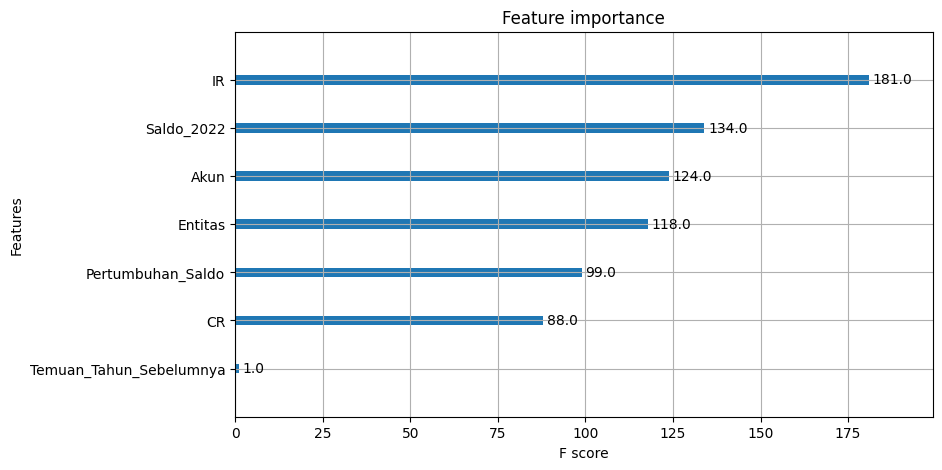

In [95]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(9,5))
plot_importance(xgb_clf, ax=ax)
plt.show()

ImportError: You must install graphviz to plot tree

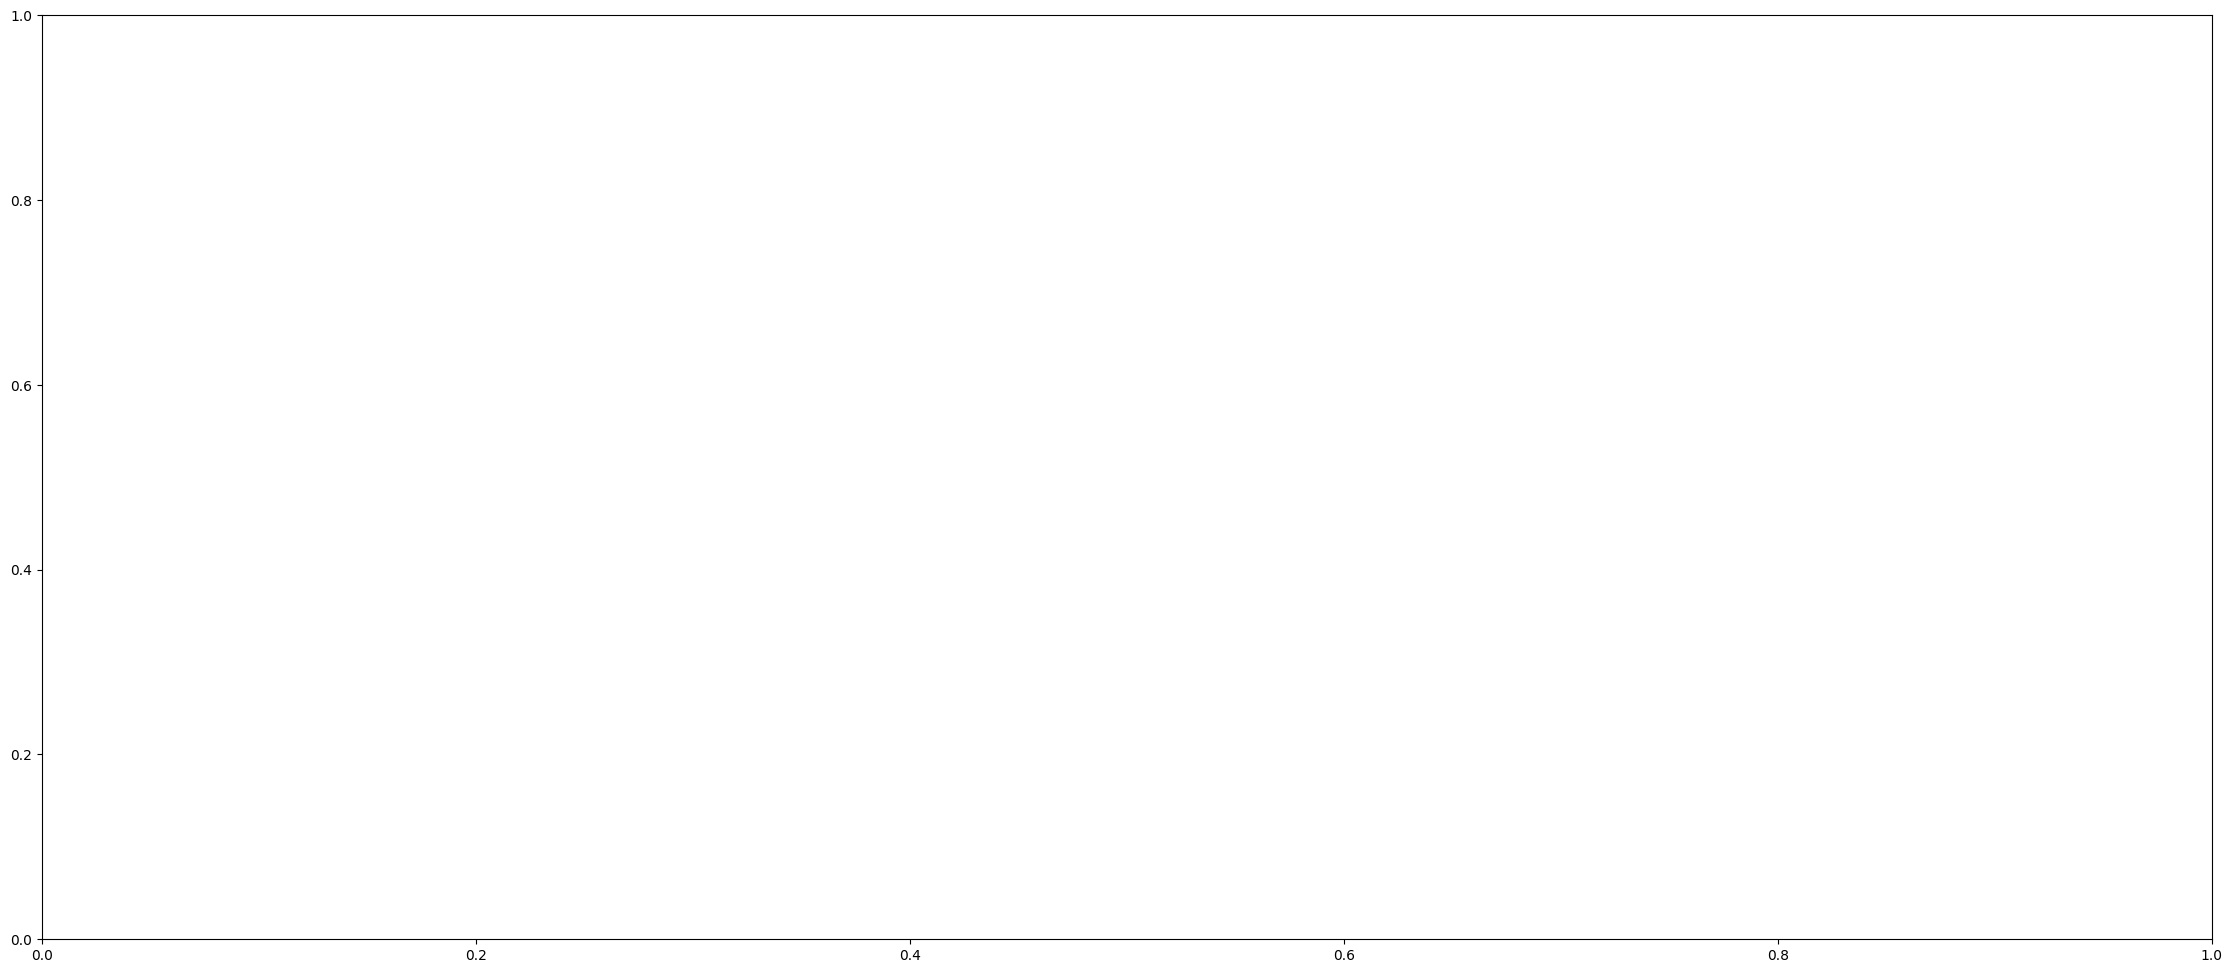

In [96]:
## ---------- Plot Model Tree ----------
## plotting model tree of best xgboost model (v3)

from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 28,12
xgb.plot_tree(xgb_clf)
plt.show()